In [1]:
import xarray as xr
import xugrid as xu
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import utm
from cht_sfincs import SFINCS
from cht_bathymetry import BathymetryDatabase
from pyproj import CRS
import os
from hydromt_sfincs import SfincsModel
import shutil
import requests
import pandas as pd
import matplotlib
import glob

In [2]:
# Load discharge data
discharge = xr.open_dataset('/media/cassandra/Expansion/Data4Cassandra/discharge_model/kitsap/output_scalar.nc')
discharge

<xarray.Dataset> Size: 2GB
Dimensions:                   (time: 248375, layer: 4, Q_gauges_obs: 32,
                               P_obs_subcatchment_obs: 32, P_subcatchment: 199,
                               T_obs_subcatchment_obs: 32, T_subcatchment: 199,
                               E_obs_subcatchment_obs: 32, E_subcatchment: 199,
                               Q_contour_gauges_contour: 875)
Coordinates:
  * time                      (time) datetime64[ns] 2MB 1940-01-01T03:00:00 ....
  * layer                     (layer) float64 32B 1.0 2.0 3.0 4.0
  * Q_gauges_obs              (Q_gauges_obs) <U8 1kB '102' '103' ... '16' '20'
  * P_obs_subcatchment_obs    (P_obs_subcatchment_obs) <U8 1kB '102' ... '20'
  * P_subcatchment            (P_subcatchment) <U3 2kB '199' '198' ... '2' '1'
  * T_obs_subcatchment_obs    (T_obs_subcatchment_obs) <U8 1kB '102' ... '20'
  * T_subcatchment            (T_subcatchment) <U3 2kB '199' '198' ... '2' '1'
  * E_obs_subcatchment_obs    (E_obs_subcatchment_obs) <U8 1kB '102' ... '20'
  * E_subcatchment            (E_subcatchment) <U3 2kB '199' '198' ... '2' '1'
  * Q_contour_gauges_contour  (Q_contour_gauges_contour) <U3 10kB '837' ... '...
Data variables:
    Q                         (time, Q_gauges_obs) float32 32MB ...
    P_obs                     (time, P_obs_subcatchment_obs) float32 32MB ...
    P                         (time, P_subcatchment) float32 198MB ...
    T_obs                     (time, T_obs_subcatchment_obs) float32 32MB ...
    T                         (time, T_subcatchment) float32 198MB ...
    E_obs                     (time, E_obs_subcatchment_obs) float32 32MB ...
    E                         (time, E_subcatchment) float32 198MB ...
    Q_contour                 (time, Q_contour_gauges_contour) float32 869MB ...

In [3]:
# Load discharge contours
discharge_gdf = gpd.read_file('/media/cassandra/Expansion/Data4Cassandra/discharge_model/kitsap/gauges_contour.geojson')
discharge_gdf = discharge_gdf.to_crs('EPSG:32610')
discharge_gdf

,fid,wflow_idx,contour,geometry
0,1,115905.0,0,POINT (528906.693 5238496.81)
1,7,25565.0,0,POINT (536501.398 5293214.075)
2,8,51523.0,0,POINT (532367.144 5277197.186)
3,9,94757.0,0,POINT (540440.828 5250018.028)
4,10,48980.0,0,POINT (536016.596 5277434.801)
...,...,...,...,...
870,987,18575.0,-1,POINT (531240.047 5296641.121)
871,988,14913.0,-1,POINT (530937.391 5298800.711)
872,989,94777.0,-1,POINT (542335.646 5251760.277)
873,990,88186.0,-1,POINT (541867.874 5255646.827)


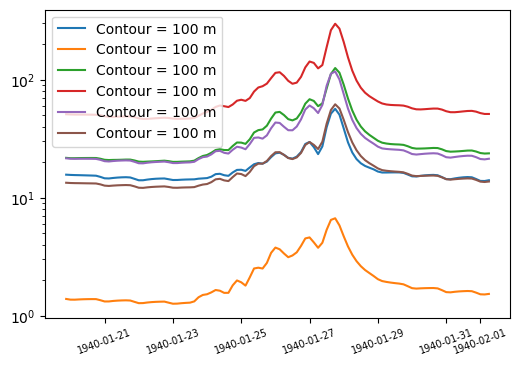

In [10]:
unique_contours = [-1, 0, 10, 20, 50, 100]
contours = discharge_gdf.contour.values

plt.figure(figsize=(6,4))
for uc in unique_contours:
    dat = discharge.Q_contour[:,contours == uc][150:250]
    cum_dat = np.nansum(dat, axis=1)
    plt.plot(discharge.time[150:250], cum_dat, label='Contour = '+str(u)+' m') #, color=colors[i])
plt.yscale('log')
plt.legend()
plt.tick_params(axis='x', which='major', labelsize=7, rotation=20)
plt.show()